In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

np.random.seed(1)

In [44]:
PATH = "lab/data/"
df_raw = pd.read_csv(f'{PATH}Credit.csv')
df_raw.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [45]:
df_raw.head(n=5)
df = df_raw.drop("Unnamed: 0", axis=1)

In [46]:
df['aristocrat'] = df.apply(lambda row: 1 if row['Income'] > 50 else 0, axis=1)

In [47]:
df.head(n=5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,aristocrat
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1


<AxesSubplot: xlabel='index', ylabel='aristocrat'>

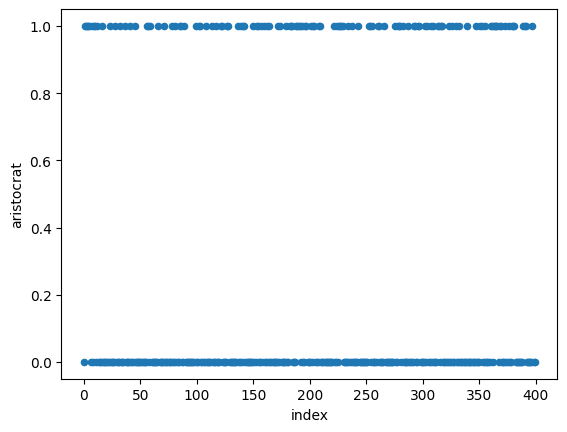

In [48]:
df.reset_index().plot(x='index', y='aristocrat', kind='scatter')

In [49]:
from sklearn.model_selection import train_test_split
from patsy.highlevel import dmatrices

df_y = df.pop('aristocrat')

X_train, X_train, y_train, y_test = train_test_split(df, df_y, test_size=0.2)
X_train.head(n=5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
125,27.578,2531,195,1,34,15,Female,No,Yes,Caucasian,0
328,41.192,3673,297,3,54,16,Female,No,Yes,Caucasian,121
339,149.316,10278,707,1,80,16,Male,No,No,African American,1107
172,76.348,4697,344,4,60,18,Male,No,No,Asian,108


In [50]:
y_train.head()

93     0
23     1
299    0
13     0
90     0
Name: aristocrat, dtype: int64

In [51]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)